   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

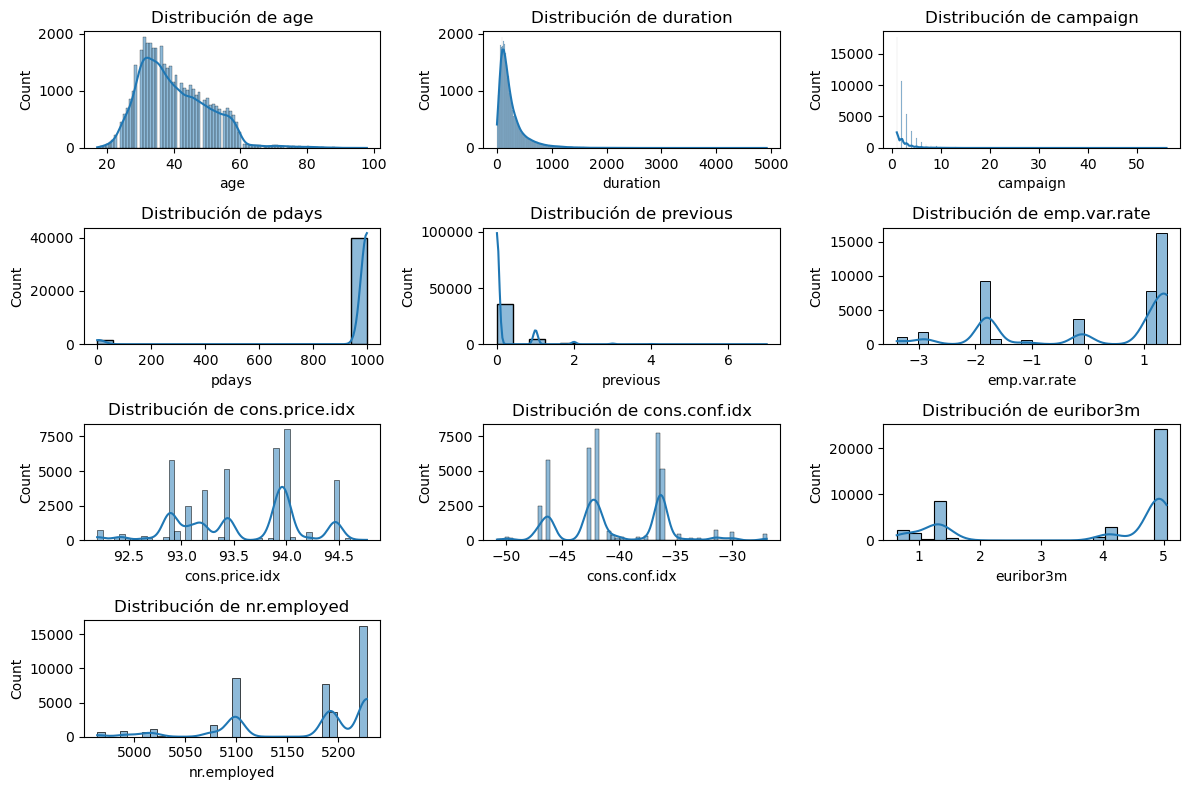

Valores atípicos detectados:
age                469
duration          2963
campaign          2406
pdays             1515
previous          5625
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      447
euribor3m            0
nr.employed          0
dtype: int64


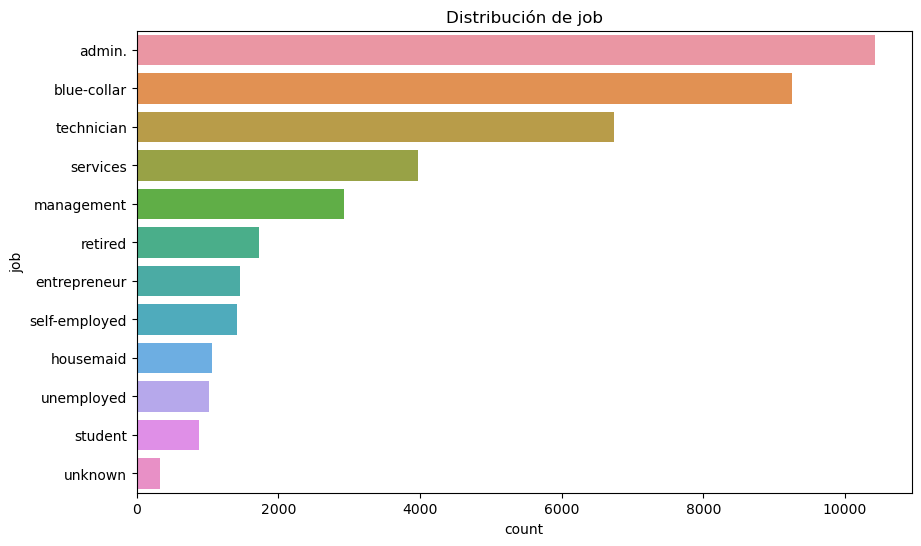

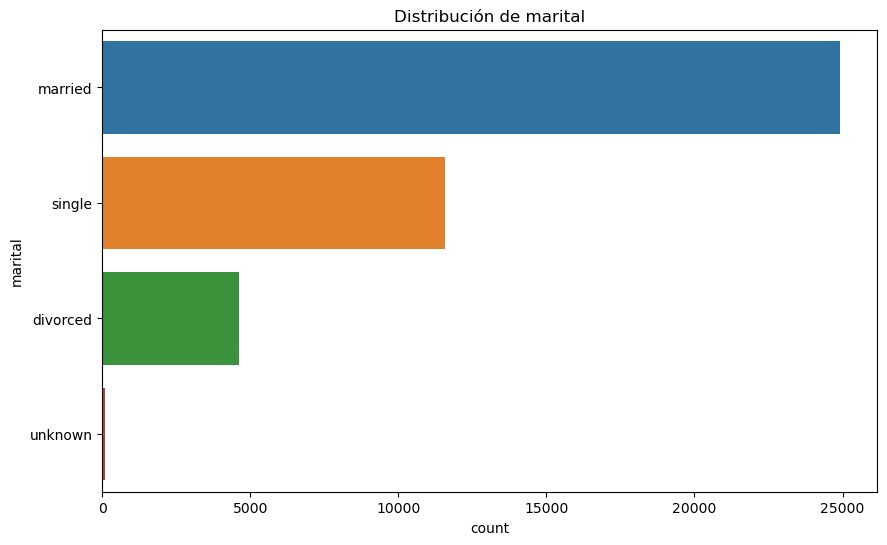

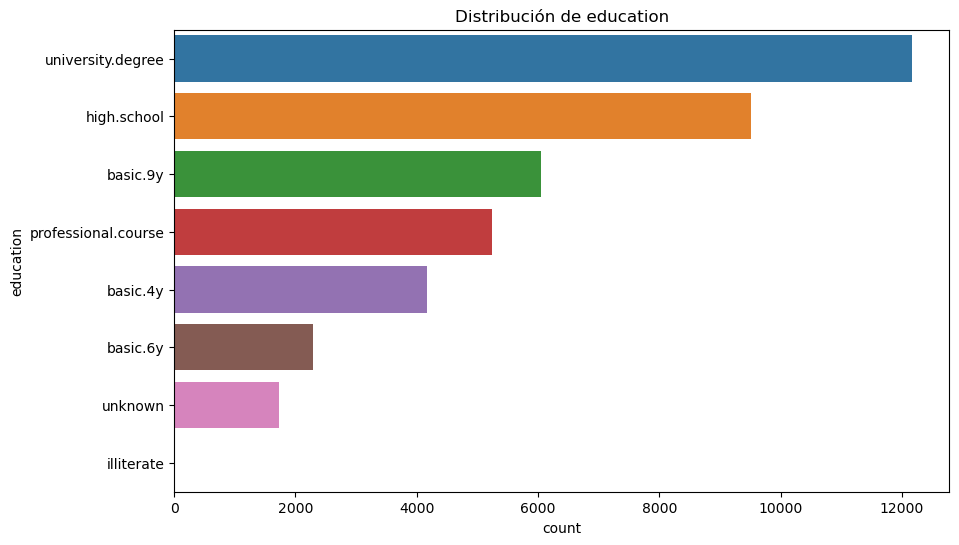

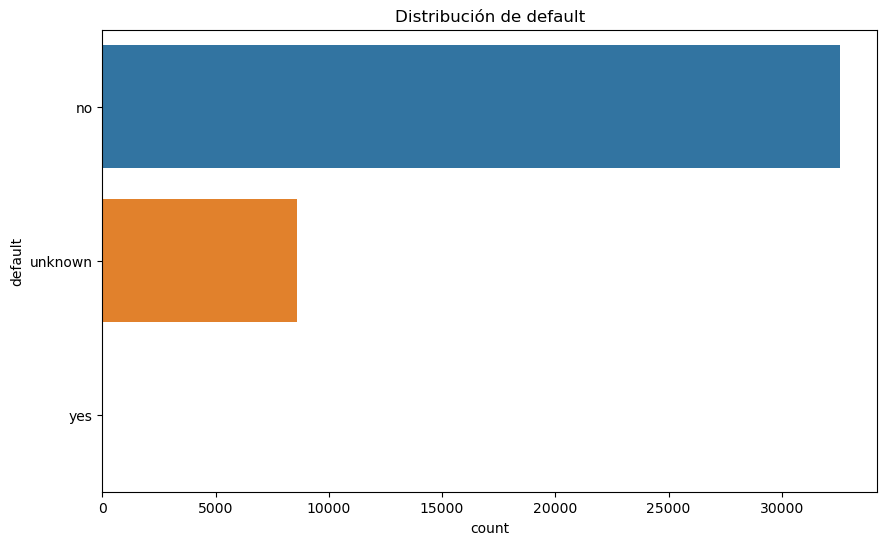

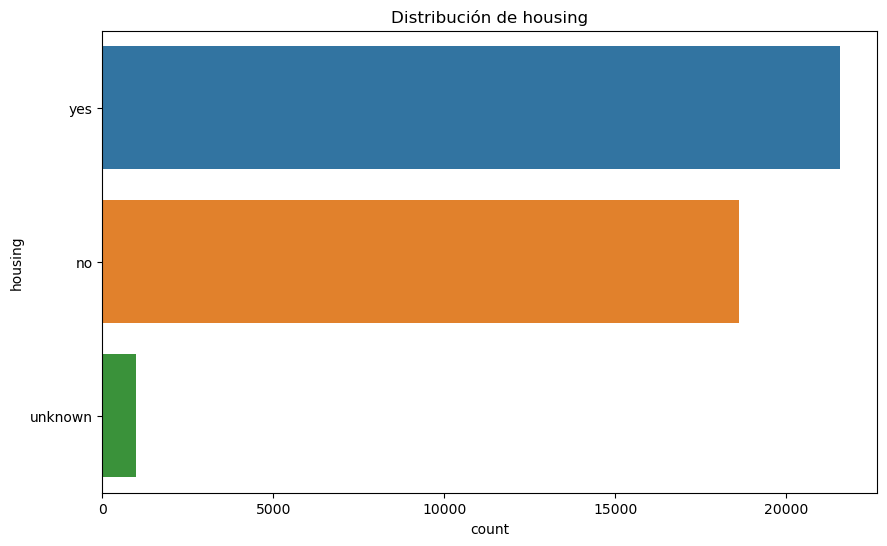

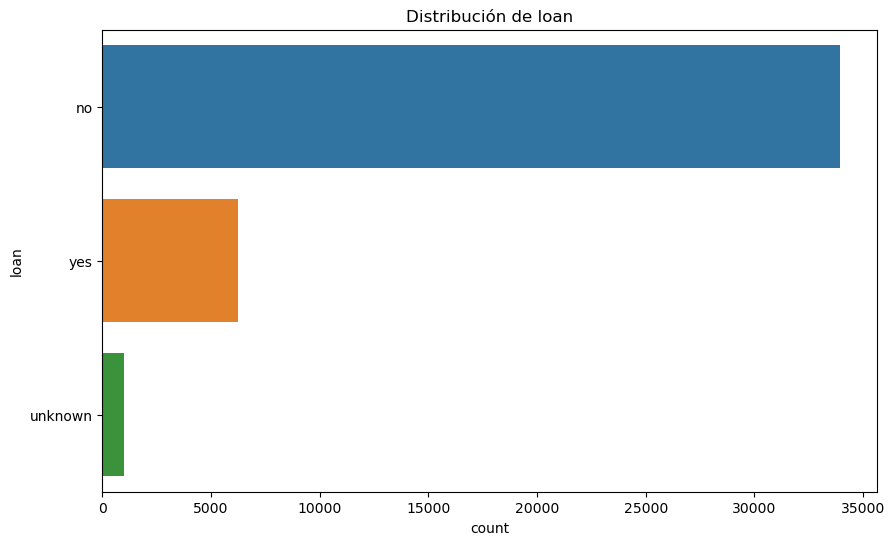

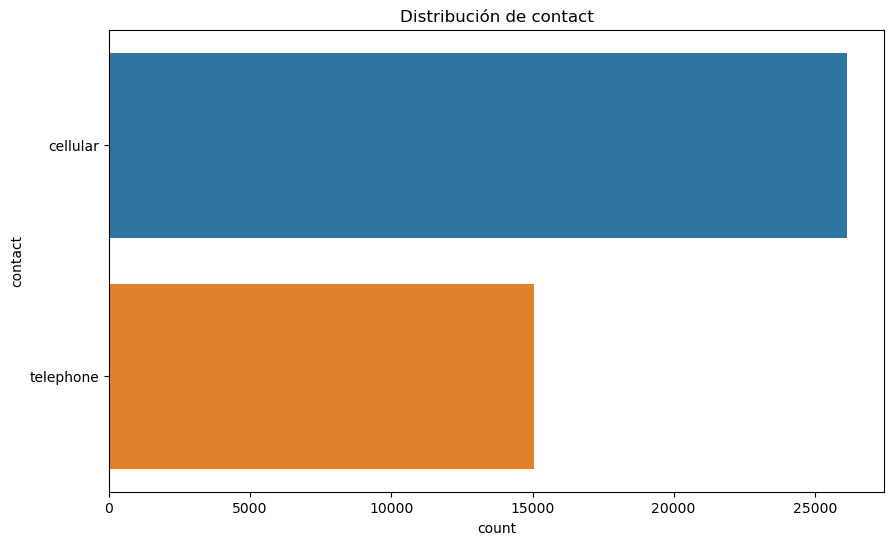

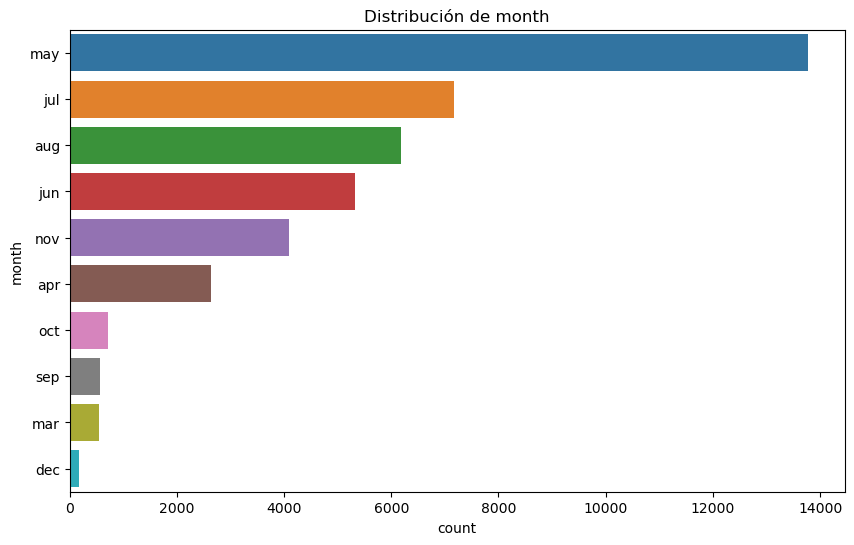

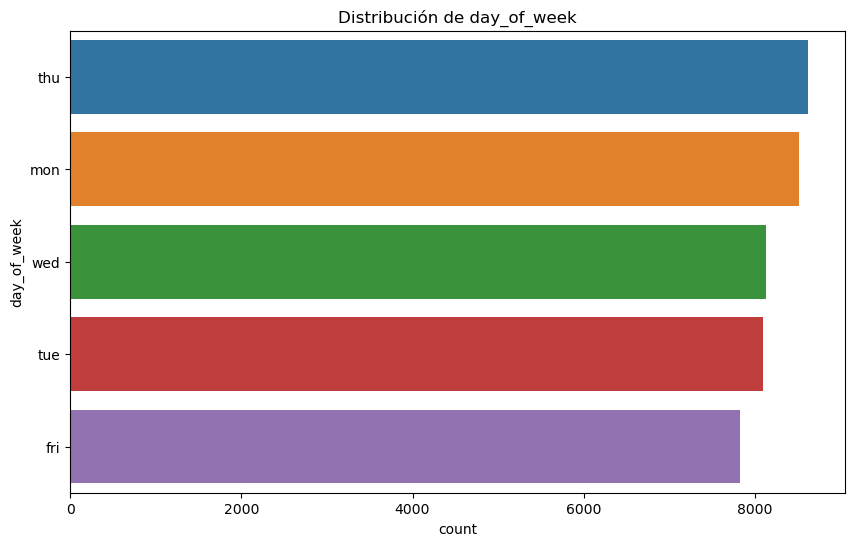

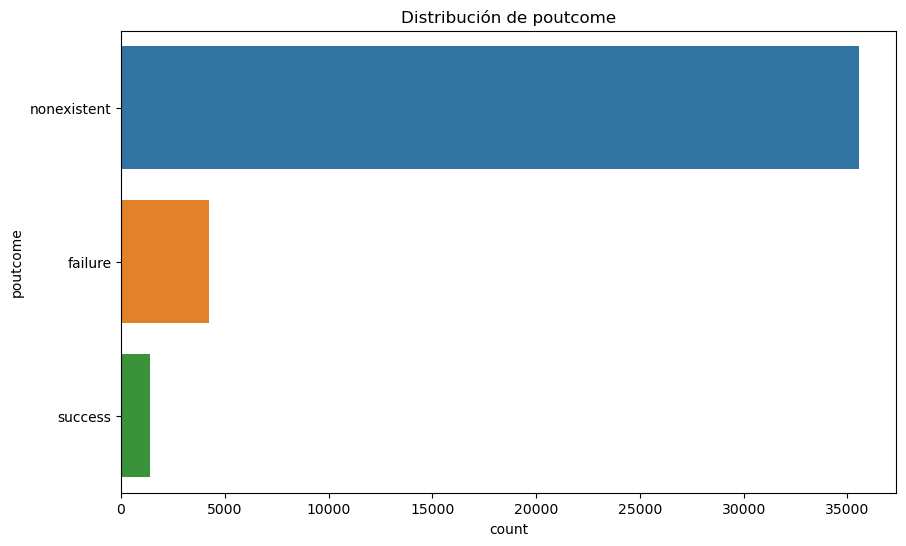

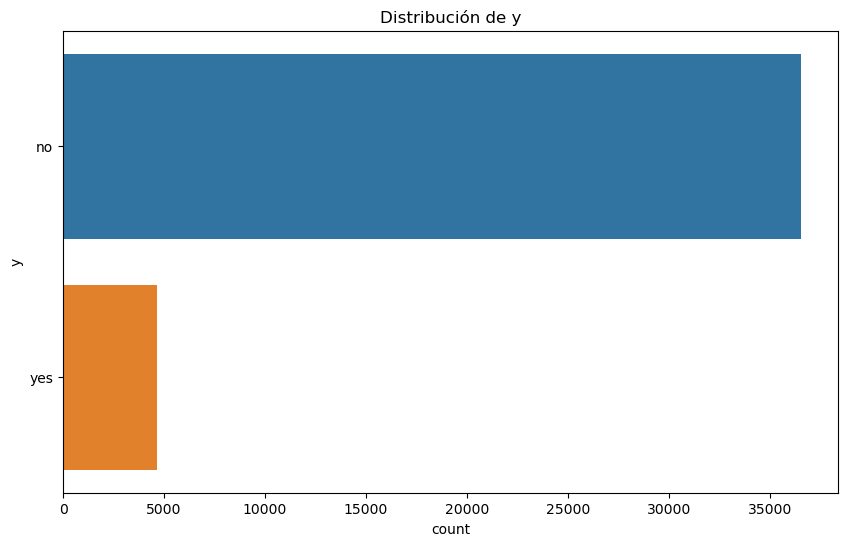

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Mostrar las primeras filas del dataset
print(df.head())

# Estadísticas descriptivas para variables numéricas
numerical_features = df.select_dtypes(include=[np.number])
print(numerical_features.describe())

# Calcular el número de filas y columnas para los subplots
num_features = len(numerical_features.columns)
num_cols = 3  # Número de columnas en la cuadrícula de subplots
num_rows = int(np.ceil(num_features / num_cols))

# Distribución de variables numéricas
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Valores atípicos utilizando el método 1.5 IQR
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1
outliers = (numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR))
print("Valores atípicos detectados:")
print(outliers.sum())

# Distribución de variables categóricas
categorical_features = df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.show()
